<span style="color:#04c921; font-size:24px; font-weight:700"> Module 5 - Linear and Multiple Regression exercises</span>

Linear regression is one of the important modelling techniques. 
We looked into some of the important concepts like fitting a linear model, 
how variation in the data is explained by the model, error of the estimates and multiple regression. 

We will apply linear regression on a new dataset which is about concrete. 
The dataset source opinions, concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate. We will fit a simple linear model for the response variable concrete compressive strength and extend it to multiple predictors to analyze and evaluate any improvement in the model.

Reading the data from dataset located at /datasets/concrete/Concrete_Data.csv

In [1]:
concrete_data = read.csv("/dsa/data/all_datasets/concrete/Concrete_Data.csv",header=TRUE)
head(concrete_data)

Cement..component.1..kg.in.a.m.3.mixture.,Blast.Furnace.Slag..component.2..kg.in.a.m.3.mixture.,Fly.Ash..component.3..kg.in.a.m.3.mixture.,Water...component.4..kg.in.a.m.3.mixture.,Superplasticizer..component.5..kg.in.a.m.3.mixture.,Coarse.Aggregate...component.6..kg.in.a.m.3.mixture.,Fine.Aggregate..component.7..kg.in.a.m.3.mixture.,Age..day.,Concrete.compressive.strength.MPa..megapascals..
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
540.0,0.0,0,162,2.5,1040.0,676.0,28,79.99
540.0,0.0,0,162,2.5,1055.0,676.0,28,61.89
332.5,142.5,0,228,0.0,932.0,594.0,270,40.27
332.5,142.5,0,228,0.0,932.0,594.0,365,41.05
198.6,132.4,0,192,0.0,978.4,825.5,360,44.30
266.0,114.0,0,228,0.0,932.0,670.0,90,47.03


The column headers are not very aesthetic or readable. 

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 1:</span> Modify the column names so that only the actual name of the column is used instead of all the unwanted description. 

The column names are present in a file called `headers.txt` in the same directory as the data. Read the data and extract the names into an array called headers.

In [18]:
# Your code for activity 1 goes here..

headers_text <- read.csv("/dsa/data/all_datasets/concrete/headers.txt", header=FALSE, sep="", dec=".", stringsAsFactor=FALSE,
                         fill=TRUE)
headers_text

headers <- c('Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate',
                 'Age', 'Concrete')

colnames(concrete_data) <- headers

nrow(concrete_data)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Cement,(component,1),--,quantitative,--,kg,in,a,m3,mixture,--,Input,Variable,,
Blast,Furnace,Slag,(component,2),--,quantitative,--,kg,in,a,m3,mixture,--,Input,Variable
Fly,Ash,(component,3),--,quantitative,--,kg,in,a,m3,mixture,--,Input,Variable,
Water,(component,4),--,quantitative,--,kg,in,a,m3,mixture,--,Input,Variable,,
Superplasticizer,(component,5),--,quantitative,--,kg,in,a,m3,mixture,--,Input,Variable,,
Coarse,Aggregate,(component,6),--,quantitative,--,kg,in,a,m3,mixture,--,Input,Variable,
Fine,Aggregate,(component,7),--,quantitative,--,kg,in,a,m3,mixture,--,Input,Variable,
Age,--,quantitative,--,Day,(1~365),--,Input,Variable,,,,,,,
Concrete,compressive,strength,--,quantitative,--,MPa,--,Output,Variable,,,,,,


[1] 1030

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 2:</span> Use sample.split() function to split the data into training and testing sets. Put 70% of data in "train_data" dataframe and rest in "test_data" dataframe. Use the seed as 1000 to reproduce test results for evaluation. 

We will evaluate the predictive capability of our model on test dataset. 

In [19]:
library(devtools)
packageurl <- "https://cran.r-project.org/src/contrib/Archive/caTools/caTools_1.16.tar.gz"
install.packages(packageurl, repos=NULL, type="source")
library(caTools)
set.seed(1000) # set.seed() will help us to reproduce the results.

# Your code for activity 2 goes here..

train_ind <- sample(seq_len(nrow(concrete_data)), size=721)

# Train data will have 70% of data
train_data  = concrete_data[train_ind,]

# Test data will have the rest 30% of data
test_data  = concrete_data[-train_ind,]

Check the correlation of independent variables with dependent variable Concrete. 

In [20]:
cor(train_data)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete
Cement,1.00000000,-0.27407697,-0.402910442,-0.07471702,0.09857493,-0.053110461,-0.2499263,0.07440891,0.4915095
Blast Furnace Slag,-0.27407697,1.00000000,-0.324768600,0.08538309,0.04875421,-0.296121875,-0.2845642,-0.04796732,0.1362753
Fly Ash,-0.40291044,-0.32476860,1.000000000,-0.25820126,0.37228283,-0.009437774,0.1032444,-0.15151748,-0.1180631
Water,-0.07471702,0.08538309,-0.258201264,1.00000000,-0.66911919,-0.186922496,-0.4296330,0.29605845,-0.2849769
Superplasticizer,0.09857493,0.04875421,0.372282834,-0.66911919,1.00000000,-0.258252953,0.2110362,-0.18684591,0.3739155
Coarse Aggregate,-0.05311046,-0.29612187,-0.009437774,-0.18692250,-0.25825295,1.000000000,-0.2015937,-0.03726348,-0.1289831
Fine Aggregate,-0.24992628,-0.28456420,0.103244413,-0.42963303,0.21103620,-0.201593677,1.0000000,-0.14493876,-0.1877710
Age,0.07440891,-0.04796732,-0.151517484,0.29605845,-0.18684591,-0.037263482,-0.1449388,1.00000000,0.3317794
Concrete,0.49150945,0.13627526,-0.118063097,-0.28497692,0.37391548,-0.128983055,-0.1877710,0.33177935,1.0000000


cement is highly correlated with concrete with a correlation of 0.51. 

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 3:</span> Fit a simple regression model to predict Concrete using Cement variable. Name this model "concrete_cement_reg". Use train_data as datasource.

In [22]:
# Your code for activity 3 goes here..

concrete_cement_reg <- lm(train_data$Concrete ~ train_data$Cement)

summary(concrete_cement_reg)




Call:
lm(formula = train_data$Concrete ~ train_data$Cement)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.488 -11.502  -0.483   9.993  43.550 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       13.188524   1.582070   8.336 3.89e-16 ***
train_data$Cement  0.079402   0.005247  15.134  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.76 on 719 degrees of freedom
Multiple R-squared:  0.2416,	Adjusted R-squared:  0.2405 
F-statistic:   229 on 1 and 719 DF,  p-value: < 2.2e-16


<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 4:</span> Plot the regression line and residual errors for above model as shown in linear and multiple regression lab. 

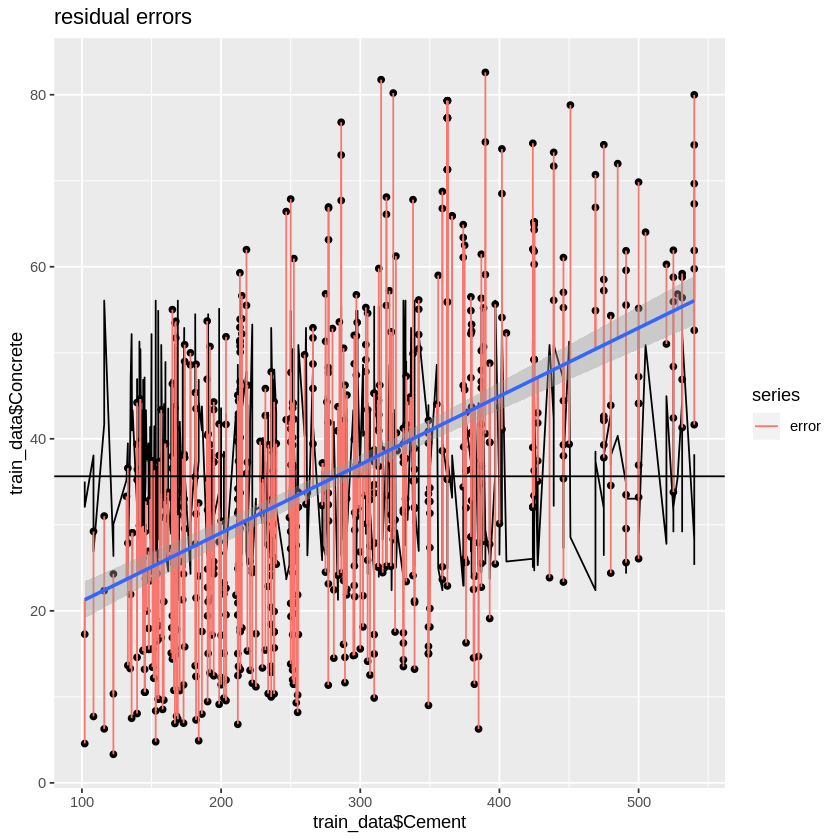

In [23]:
# Your code for activity 4 goes here..

library(ggplot2)

# The predicted values for dependent variable 'Concrete' can be accessed by referring to fitted.values of the model as shown below.
pred_values<-concrete_cement_reg$fitted.values

#plot the regression line and residual errors

qplot(x=train_data$Cement, y=train_data$Concrete)+
        geom_line(y=pred_values)+ # Draw the regression line with predicted values
        geom_segment(aes(x=train_data$Cement, xend=train_data$Cement, y=train_data$Concrete, yend=pred_values, color="error"))+ 
                                                                    # Draw residuals, lines 
                                                                    # from each point to the regression line.
        geom_smooth(method=lm,level = 0.95)+ # Add linear regression line, by default includes 95% confidence region
        geom_hline(aes(yintercept=mean(train_data$Concrete)))+ # baseline model. line drawn at mean(dist).
       labs(title="residual errors", color="series")





According to the R-squared value the variable Cement can only explain 26% of the variation in the data. 

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 5:</span> Calculate Sum of squared errors of above model where SSE = Sum of squares of residual terms. You can access residuals by accessing model using following syntax: concrete_cement_reg$residuals.

In [24]:
# Your code for activity 5 goes here..

SSE <- sum(concrete_cement_reg$residuals^2)
SSE




[1] 156694.2

We have seen Cement was a significant variable in predicting Concrete strength. Its the most correlated variable with Concrete. So if we have to build the model with just one variable to predict Concrete strength, Cement would be the best predictor. Move on to multiple regression and add more variables to the mdoel. Add the next highly correlated variable to the model.

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 6:</span> Add Superplasticizer to the simple regression model fitted above and predict Concrete in train_data. Name this model "concrete_reg1".

In [26]:
# Your code for activity 6 goes here..

concrete_reg1 <- lm(train_data$Concrete ~ train_data$Cement + train_data$Superplasticizer)

summary(concrete_reg1)


Call:
lm(formula = train_data$Concrete ~ train_data$Cement + train_data$Superplasticizer)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.123 -10.678  -0.579   9.268  43.837 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  9.13503    1.51403   6.034 2.57e-09 ***
train_data$Cement            0.07417    0.00489  15.168  < 2e-16 ***
train_data$Superplasticizer  0.91780    0.08453  10.858  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.69 on 718 degrees of freedom
Multiple R-squared:  0.3485,	Adjusted R-squared:  0.3467 
F-statistic: 192.1 on 2 and 718 DF,  p-value: < 2.2e-16


Superplasticizer has added value to the model. R-squared value increased from 0.25 to 0.35. Add next highly correlated variable Age to the model and call this model concrete_reg2.

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 7:</span> Add Age to concrete_reg1 model fitted above to predict Concrete. Name this model "concrete_reg2". Check for any improvement in the R-squared value. 

In [27]:
# Your code for activity 7 goes here..

concrete_reg2 <- lm(train_data$Concrete ~ train_data$Cement + train_data$Superplasticizer + train_data$Age)

summary(concrete_reg2)






Call:
lm(formula = train_data$Concrete ~ train_data$Cement + train_data$Superplasticizer + 
    train_data$Age)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.138  -9.004  -0.402   7.552  45.833 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 4.946376   1.383614   3.575 0.000374 ***
train_data$Cement           0.068484   0.004378  15.644  < 2e-16 ***
train_data$Superplasticizer 1.123362   0.076816  14.624  < 2e-16 ***
train_data$Age              0.098929   0.007234  13.676  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.2 on 717 degrees of freedom
Multiple R-squared:  0.4833,	Adjusted R-squared:  0.4812 
F-statistic: 223.6 on 3 and 717 DF,  p-value: < 2.2e-16


The model is getting better with addition of new predictors. The latest model concrete_reg2 can explain more variation in the data. If we keep on adding the data at some point there would be an insignificant increase in the model R-squared value. Its better to exclude variables to avoid over fitting of models. The variables Coarse, Fine, Fly don't contribute much to the model to the model built with  Cement+Superplasticizer+Age+Blast+Water as predictos. 

We had to check each variable if it was adding any new information to the model. This can become time consuming when there are few 10's of variables in the model. Instead you can reverse engineer and build a model using all the independent variables and start selecting the variables which are significant or exclude variables that are insignificant which ever works the best in a situation.  

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 8:</span> Fit a multiple regression model using all the independent variables in concrete_data dataset to predict Concerte. Name this model concrete_reg3.

In [28]:
# Your code for activity 8 goes here..

concrete_reg3 <- lm(train_data$Concrete ~ train_data$Cement + train_data$Superplasticizer + train_data$Age + train_data$Blast +
                       train_data$Water + train_data$Coarse + train_data$Fine + train_data$Fly)

summary(concrete_reg3)





Call:
lm(formula = train_data$Concrete ~ train_data$Cement + train_data$Superplasticizer + 
    train_data$Age + train_data$Blast + train_data$Water + train_data$Coarse + 
    train_data$Fine + train_data$Fly)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.729  -6.606   0.798   7.058  34.193 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -24.353965  32.192241  -0.757  0.44959    
train_data$Cement             0.116593   0.010033  11.620  < 2e-16 ***
train_data$Superplasticizer   0.362786   0.115817   3.132  0.00180 ** 
train_data$Age                0.117087   0.006568  17.826  < 2e-16 ***
train_data$Blast              0.100020   0.012248   8.166 1.45e-15 ***
train_data$Water             -0.147941   0.049076  -3.015  0.00267 ** 
train_data$Coarse             0.021639   0.011576   1.869  0.06198 .  
train_data$Fine               0.017532   0.012804   1.369  0.17137    
train_data$Fly                0.080623   

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 9:</span> According to the summary of the model concrete_reg3 above remove the variables with p-value greater than 0.05 and from the model and rebuild the model with the rest variables. Name this model concrete_reg4.

In [29]:
# Your code for activity 9 goes here..

concrete_reg4 <- lm(train_data$Concrete ~ train_data$Cement + train_data$Superplasticizer + train_data$Age + train_data$Blast +
                       train_data$Water + train_data$Fly)

summary(concrete_reg4)






Call:
lm(formula = train_data$Concrete ~ train_data$Cement + train_data$Superplasticizer + 
    train_data$Age + train_data$Blast + train_data$Water + train_data$Fly)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.132  -6.610   0.735   6.871  34.949 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 29.638018   5.208566   5.690 1.85e-08 ***
train_data$Cement            0.103895   0.005235  19.846  < 2e-16 ***
train_data$Superplasticizer  0.270706   0.103420   2.618  0.00904 ** 
train_data$Age               0.116274   0.006540  17.780  < 2e-16 ***
train_data$Blast             0.083405   0.006034  13.823  < 2e-16 ***
train_data$Water            -0.219611   0.026239  -8.370 3.04e-16 ***
train_data$Fly               0.063799   0.009595   6.649 5.87e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.65 on 714 degrees of freedom
Multiple R-squared:  0.6082,	Adjusted 

The R-squared value of above model concrete_reg4 is 0.59. This is the best model you can get without applying any more advanced techniques. You came to this point in two steps doing reverse engineering eliminating variables from the model. Above approach of including predictors one by one and checking R-squared value will make build eight different models adding eight variables to model one by one. So this second approach is the better one. This may not be the case in all situations but its a better approach when your data has many predictors. 

# Save your notebook!